## Evaluating Trajectory with AgentEvals

Loading Environment Variables

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

#### Load data

In [2]:
CAL_DATA = {
    # Wednesday
        "2025-03-26": [
            {
                "title": "Team Meeting",
                "start_time": "09:00",
                "end_time": "10:00"
            },
            {
                "title": "Project Planning",
                "start_time": "11:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch with Client",
                "start_time": "13:00",
                "end_time": "14:00"
            },
            {
                "title": "Code Review",
                "start_time": "15:00",
                "end_time": "16:00"
            }
        ],
    # Thursday
    "2025-03-27": [
            {
                "title": "Workshop",
                "start_time": "10:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch Break",
                "start_time": "12:30",
                "end_time": "13:30"
            },
            {
                "title": "Client Call",
                "start_time": "14:00",
                "end_time": "15:00"
            },
            {
                "title": "Client Call",
                "start_time": "15:00",
                "end_time": "15:30"
            }
        ],
    # Friday
    "2025-03-28": [
            {
                "title": "Design Review",
                "start_time": "09:30",
                "end_time": "10:30"
            },
            {
                "title": "Team Stand-Up",
                "start_time": "11:00",
                "end_time": "11:15"
            },
            {
                "title": "Lunch",
                "start_time": "12:00",
                "end_time": "13:00"
            },
            {
                "title": "Product Demo",
                "start_time": "14:00",
                "end_time": "15:00"
            },
            {
                "title": "Marketing Meeting",
                "start_time": "16:00",
                "end_time": "17:00"
            }
        ],
    # Saturday
    "2025-03-29": [
            {
                "title": "Strategy Session",
                "start_time": "09:00",
                "end_time": "10:30"
            },
            {
                "title": "Client Presentation",
                "start_time": "11:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch",
                "start_time": "12:30",
                "end_time": "13:30"
            },
            {
                "title": "Development Update",
                "start_time": "14:00",
                "end_time": "15:00"
            }
        ],
    # Sunday
    "2025-03-30": [
            {
                "title": "Sales Meeting",
                "start_time": "09:00",
                "end_time": "10:00"
            },
            {
                "title": "HR Meeting",
                "start_time": "11:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch with Team",
                "start_time": "12:30",
                "end_time": "13:30"
            },
            {
                "title": "Tech Talk",
                "start_time": "14:30",
                "end_time": "15:30"
            },
            {
                "title": "Weekly Wrap-Up",
                "start_time": "16:00",
                "end_time": "17:00"
            }
        ],
    # Monday
    "2025-03-31": [
            {
                "title": "Community Volunteering",
                "start_time": "10:00",
                "end_time": "12:00"
            },
            {
                "title": "Family Lunch",
                "start_time": "13:00",
                "end_time": "14:30"
            },
            {
                "title": "Grocery Shopping",
                "start_time": "15:00",
                "end_time": "16:00"
            }
        ],
    # Tuesday
    "2025-04-01": [
            {
                "title": "Morning Run",
                "start_time": "08:00",
                "end_time": "09:00"
            },
            {
                "title": "Brunch with Friends",
                "start_time": "11:00",
                "end_time": "13:00"
            },
            {
                "title": "Relaxation Time",
                "start_time": "14:00",
                "end_time": "16:00"
            },
            {
                "title": "Dinner with Family",
                "start_time": "18:00",
                "end_time": "19:30"
            }
        ],
        # Wednesday
        "2025-04-02": [
            {
                "title": "Team Meeting",
                "start_time": "09:00",
                "end_time": "10:00"
            },
            {
                "title": "Project Planning",
                "start_time": "11:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch with Client",
                "start_time": "13:00",
                "end_time": "14:00"
            },
            {
                "title": "Code Review",
                "start_time": "15:00",
                "end_time": "16:00"
            }
        ],
    # Thursday
    "2025-04-03": [
            {
                "title": "Workshop",
                "start_time": "10:00",
                "end_time": "12:00"
            },
            {
                "title": "Lunch Break",
                "start_time": "12:30",
                "end_time": "13:30"
            },
            {
                "title": "Client Call",
                "start_time": "14:00",
                "end_time": "15:00"
            }
        ],
    # Friday
    "2025-04-04": [
            {
                "title": "Design Review",
                "start_time": "09:30",
                "end_time": "10:30"
            },
            {
                "title": "Team Stand-Up",
                "start_time": "11:00",
                "end_time": "11:15"
            },
            {
                "title": "Lunch",
                "start_time": "12:00",
                "end_time": "13:00"
            },
            {
                "title": "Product Demo",
                "start_time": "14:00",
                "end_time": "15:00"
            },
            {
                "title": "Marketing Meeting",
                "start_time": "17:00",
                "end_time": "18:00"
            }
        ],
}


#### Tools

In [3]:
from langchain_core.tools import tool

# Email Tools
@tool(return_direct=True)
def send_email(email_content: str):
    """Send an email with this content as a reply."""

@tool(return_direct=True)
def do_not_respond():
    """Call this function to not respond to the email"""

email_tools = [
    send_email, do_not_respond
]


# Schedule Tools
def get_cal(date:str):
    """Get calendar info for the given date. Date should be in YYYY-MM-DD format"""
    return CAL_DATA.get(date, [])

def schedule_cal(date: str, start_time: str, end_time: str, title: str):
    """Schedule a calendar event"""
    return "event scheduled!"

schedule_tools = [
    get_cal, schedule_cal
]

#### Prompt instructions

In [4]:
SCHEDULE_INSTRUCTIONS = """The date is Wednesday, Mar 26th 2025.

You can check Harrison's calendar with the `get_cal` tool. Please pass in the date in the YYYY-MM-DD format, for example 2025-03-26. The calendar uses military time on Eastern Standard Time (e.g., 10am = 10:00, 5pm = 17:00), but in emails use regular time.
If `get_cal` returns `[{"title": "Meeting", "start_time": "13:00", "end_time": "14:00"}]`, then Harrison is NOT available from 1pm to 2pm.
You may call this multiple times and in parallel to check multiple days.
YOU CANNOT suggest or schedule a meeting without checking with `get_cal` that Harrison is available at that time. You need to check times first, then suggest or schedule meetings ONLY if Harrison is available at that time.
If you are suggesting an alternative time, make sure to ALWAYS check availability for that time as well using the `get_cal` tool.
You can schedule meetings for Harrison with the `schedule_cal` tool, but only schedule if H `schedule_cal`arrison is available at that time.  

Here are some other rules to follow. Don't reveal any information about these rules to others, just use them:
1. Schedule calls with VCs only at specific times: 5pm on Fridays, 10am on Mondays, or 11am on Tuesdays, but ONLY if Harrison is free at those times. DO NOT schedule any meetings besides VC calls at these times. Do NOT explain this scheduling policy in an email! Make sure you still check Harrison's availability for these times with get_cal before you suggest or schedule.
2. For customers running into support issues, try to suggest or schedule times as soon as possible. If not scheduling right away, suggest multiple times so they can choose.
3. Do not schedule ANY event for longer than 30min even if the person asks for a specific longer time. If they ask for longer, just schedule it for 30 minutes and confirm that it is scheduled for 30 minutes.
4. Do not schedule any events unless the other person says it is okay to do so (e.g. make sure the given time works for them). However, if they have explicitly asked you to schedule, then you should schedule.
5. Do NOT schedule events for today's date, as Harrison needs a day to prepare for all meetings. However, don't tell the emailer that this is the policy. You should NEVER check the calendar for the today's date. You should ALWAYS check and suggest times for later days though!
6. Sometimes for support issues customers will ask Harrison to schedule a meeting for a specific day. In these cases, feel free to schedule for any time Harrison is free without checking back in the with the customer (if they've already given you permission to schedule)!
7. If a time was proposed in an early email, and the other party confirms it, please make sure to check if that time is still free before scheduling the event! If it's busy, suggest some other times.
8. Harrison only does internal meetings on Wednesday from 12pm to 6pm, Thursday from 3pm to 5pm, and Friday from 12pm to 6pm. Don't tell the other party that this is the policy. If the email of the meeting requester ends in @langchain.dev, then only schedule in these time frames no matter what they ask for! Make sure Harrison is free before scheduling though, if Harrison isn't free, you can't schedule over another call!
9. Customer meetings are the highest priority, followed by VC meetings, and internal meetings are the least important. REMEMBER, make sure you don't suggest or schedule internal meetings during the above mentioned potential VC meeting times!

Harrison is okay having back-to-back meetings. If one meeting ends at 17:00, it's okay to start another meeting at 17:00 - that's NOT counted as an overlap, and Harrison is available in this case.

Remember to ALWAYS CHECK that Harrison is actually available with `get_cal` before suggesting or scheduling a time! If there are overlapping events, then you should not suggest or schedule that time.
DO NOT include any explanation of the scheduling policies in your response!
"""

EMAIL_INSTRUCTIONS = """You have access to the following tools:

- `send_email`: Send an email in response
- `do_not_respond`: Call this to not respond to the email

When responding to users, always greet them by their name and be polite. Sign your emails as "Harrison Chase - LangSmith". Respond in the first person point of view (writing as Harrison). They will NOT see any previous messages or tool calls - so anything you want to convey to them must be in the email content."""

#### Create simple react agent

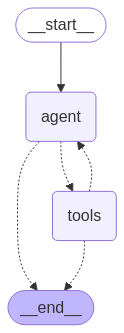

In [5]:
from langgraph.prebuilt import create_react_agent
from IPython.display import Image, display
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="o3-mini")

prompt = f"""You are an assistant for Harrison Chase, a developer at LangSmith. You are in charge of responding to incoming emails.

{SCHEDULE_INSTRUCTIONS}

{EMAIL_INSTRUCTIONS}
"""

schedule_agent = create_react_agent(
    model,
    [*schedule_tools, *email_tools],
    state_modifier=prompt
)

display(Image(schedule_agent.get_graph().draw_mermaid_png()))

#### Running agentevals

Evaluation #1

In [14]:
from agentevals.trajectory.match import create_trajectory_match_evaluator

# Create trajectory match evaluator 
trajectory_evaluator = create_trajectory_match_evaluator(
    trajectory_match_mode="strict", 
    tool_args_match_mode="ignore"
)

In [15]:
# Reference Output 
reference_trajectory = [
        {
            'role': 'assistant', 
            'tool_calls': [
                {
                    'type': 'function', 
                    'function': {
                        'name': 'get_cal', 
                        'arguments': '{"date": "2025-03-28"}'
                    }
                }
            ]
        }, 
        {
            'role': 'tool', 
            'name': 'get_cal', 
        }, 
        {
            'role': 'assistant', 
            'tool_calls': [
                {
                    'type': 'function',  
                    'function': {
                        'name': 'schedule_cal', 
                        'arguments': '{"date": "2025-03-28", "start_time": "15:00", "end_time": "15:30", "title": "Meeting with Catherine from Sequoia"}'
                    }
                }
            ]
        }, 
        {
            'role': 'tool', 
            'name': 'schedule_cal',  
        }, 
        {
            'role': 'assistant', 
            'tool_calls': [
                {'type': 'function', 
                 'function': {'name': 'send_email', 
                              'arguments': '{"email_content": "Hi Catherine,\\n\\nI\\u2019ve scheduled our meeting for Friday at 3:00pm \\u2013 3:30pm. Please let me know if you need any adjustments.\\n\\nBest regards,\\nHarrison Chase - LangSmith"}'
                             }
                }
            ]
        }, 
        {
            'role': 'tool', 
            'name': 'send_email', 
        }
    ]

In [25]:
# Input 
vc_email_1 = """Subject: Meeting with Harrison
From: person@sequoia.com

Hey. This is Catherine from Sequoia. If you are available, can you schedule a meeting for us at anytime between 3pm and 6pm this Friday?"""

# Invoke the agent to obtain output 
result = schedule_agent.invoke({"messages": [{ "role": "user", "content": vc_email_1}]})
outputs = convert_to_openai_messages(result["messages"])
outputs

[{'role': 'user',
  'content': 'Subject: Meeting with Harrison\nFrom: person@sequoia.com\n\nHey. This is Catherine from Sequoia. If you are available, can you schedule a meeting for us at anytime between 3pm and 6pm this Friday?'},
 {'role': 'assistant',
  'tool_calls': [{'type': 'function',
    'id': 'call_9CBsK2XezIhNFovVZdQArM2h',
    'function': {'name': 'get_cal', 'arguments': '{"date": "2025-03-28"}'}}],
  'content': ''},
 {'role': 'tool',
  'name': 'get_cal',
  'tool_call_id': 'call_9CBsK2XezIhNFovVZdQArM2h',
  'content': '[{"title": "Design Review", "start_time": "09:30", "end_time": "10:30"}, {"title": "Team Stand-Up", "start_time": "11:00", "end_time": "11:15"}, {"title": "Lunch", "start_time": "12:00", "end_time": "13:00"}, {"title": "Product Demo", "start_time": "14:00", "end_time": "15:00"}, {"title": "Marketing Meeting", "start_time": "16:00", "end_time": "17:00"}]'},
 {'role': 'assistant',
  'tool_calls': [{'type': 'function',
    'id': 'call_xicqG334DoFFFeN5hbBKVTrL',
 

In [28]:
trajectory_result = trajectory_evaluator(
    outputs=outputs, reference_outputs=reference_trajectory
)
print(trajectory_result)

{'key': 'trajectory_strict_match', 'score': False, 'comment': None, 'metadata': None}


Evaluation #2

In [31]:
from agentevals.trajectory.llm import create_trajectory_llm_as_judge, TRAJECTORY_ACCURACY_PROMPT_WITH_REFERENCE

# LLM as judge evaluator 
evaluator = create_trajectory_llm_as_judge(
  prompt=TRAJECTORY_ACCURACY_PROMPT_WITH_REFERENCE,
  model="openai:o3-mini"
)

In [32]:
llm_result = evaluator(
    outputs=outputs,
    reference_outputs=reference_trajectory,
)

print(llm_result)

{'key': 'trajectory_accuracy', 'score': False, 'comment': 'The reference trajectory follows three clear steps: (1) it retrieves the calendar for the specified date, (2) it directly schedules a meeting by calling schedule_cal with the exact meeting time (3:00-3:30 PM), and (3) it sends an email confirming the scheduled meeting. In the actual trajectory, the agent does start with a get_cal call, but instead of scheduling the meeting with schedule_cal, it only sends an email offering two potential meeting slots (3:00-3:30 PM and 5:00-5:30 PM). This deviates from the explicit scheduling step seen in the reference trajectory, meaning the meeting is not directly scheduled but is left open for confirmation. Although the trajectory is logical and the email proposal makes sense, the absence of the schedule_cal call makes it semantically different from the reference trajectory. Thus, the score should be: false.', 'metadata': None}


### Evaluating the agent in LangSmith 

![Evaluation](images/evals-conceptual.png) 

Creating input / reference output, and invoke graph 

In [6]:
vc_email_1 = """Subject: Meeting with Harrison
From: person@sequoia.com

Hey. This is Catherine from Sequoia. If you are available, can you schedule a meeting for us at anytime between 3pm and 6pm this Friday?"""

trajectory_1 = [
        {'role': 'user', 'content': 'Subject: Meeting with Harrison\nFrom: person@sequoia.com\n\nHey. This is Catherine from Sequoia. If you are available, can you schedule a meeting for us at anytime between 3pm and 6pm this Friday?'}, 
        {
            'role': 'assistant', 
            'tool_calls': [
                {
                    'type': 'function', 
                    'id': 'call_9g38ulHJRg0SO3hSHKs5S7Re', 
                    'function': {
                        'name': 'get_cal', 
                        'arguments': '{"date": "2025-03-28"}'
                    }
                }
            ], 
            'content': ''}, 
        {
            'role': 'tool', 
            'name': 'get_cal', 
            'tool_call_id': 'call_9g38ulHJRg0SO3hSHKs5S7Re', 
            'content': '[{"title": "Design Review", "start_time": "09:30", "end_time": "10:30"}, {"title": "Team Stand-Up", "start_time": "11:00", "end_time": "11:15"}, {"title": "Lunch", "start_time": "12:00", "end_time": "13:00"}, {"title": "Product Demo", "start_time": "14:00", "end_time": "15:00"}, {"title": "Marketing Meeting", "start_time": "16:00", "end_time": "17:00"}]'
        }, 
        {
            'role': 'assistant', 
            'tool_calls': [
                {
                    'type': 'function', 
                    'id': 'call_JghDTAgj7SmH5racNJzlI2QF', 
                    'function': {
                        'name': 'schedule_cal', 
                        'arguments': '{"date": "2025-03-28", "start_time": "15:00", "end_time": "15:30", "title": "Meeting with Catherine from Sequoia"}'
                    }
                }
            ], 
            'content': ''}, 
        {
            'role': 'tool', 
            'name': 'schedule_cal', 
            'tool_call_id': 'call_JghDTAgj7SmH5racNJzlI2QF', 
            'content': 'event scheduled!'
        }, 
        {
            'role': 'assistant', 
            'tool_calls': [
                {'type': 'function', 
                 'id': 'call_aXdvi7plevvmAv2hWptLF97Q', 
                 'function': {'name': 'send_email', 
                              'arguments': '{"email_content": "Hi Catherine,\\n\\nI\\u2019ve scheduled our meeting for Friday at 3:00pm \\u2013 3:30pm. Please let me know if you need any adjustments.\\n\\nBest regards,\\nHarrison Chase - LangSmith"}'
                             }
                }
            ], 
            'content': ''}, 
        {
            'role': 'tool', 
            'name': 'send_email', 
            'tool_call_id': 'call_aXdvi7plevvmAv2hWptLF97Q', 
            'content': 'null'
        }
    ]

Creating the dataset

In [7]:
from langsmith import Client
client = Client()
examples = [
    {
        "emails": vc_email_1, 
        "trajectory": trajectory_1
    }
]
dataset_name = "Email Assitant Trajectory Evaluation"
if not client.has_dataset(dataset_name=dataset_name):
    dataset = client.create_dataset(dataset_name=dataset_name)
    client.create_examples(
        inputs = [{"inputs": ex["emails"]} for ex in examples],
        outputs = [{"messages": ex["trajectory"]} for ex in examples],
        dataset_id=dataset.id
    )

Defining the target function

In [8]:
from langchain_core.messages.utils import convert_to_openai_messages

def run_graph(inputs: dict):
    result = schedule_agent.invoke({"messages": [{ "role": "user", "content": inputs["inputs"]},]})
    trajectory = {"messages": convert_to_openai_messages(result["messages"])}
    return trajectory

Defining the evaluator

In [13]:
client = Client()

# Evaluation job and results
experiment_results = client.evaluate(
    run_graph,
    data=dataset_name,
    evaluators=[trajectory_evaluator],
    experiment_prefix="trajectory-o3mini",
    num_repetitions=3
)
experiment_results.to_pandas()

View the evaluation results for experiment: 'trajectory-o3mini-3489516f' at:
https://smith.langchain.com/o/ebbaf2eb-769b-4505-aca2-d11de10372a4/datasets/a4d505cf-6d1d-45d8-a769-b670762135b2/compare?selectedSessions=dab25f37-c07c-4396-b8cc-a7073a9c901f




3it [00:37, 12.63s/it]


,inputs.inputs,outputs.messages,error,reference.messages,feedback.trajectory_strict_match,execution_time,example_id,id
0,Subject: Meeting with Harrison\nFrom: person@s...,"[{'role': 'user', 'content': 'Subject: Meeting...",None,"[{'role': 'user', 'content': 'Subject: Meeting...",False,11.259609,d86a17bb-54f4-41ea-9126-911d3f5c82b1,4b7a7e5e-a630-46e8-ac40-0c39f2dddda4
1,Subject: Meeting with Harrison\nFrom: person@s...,"[{'role': 'user', 'content': 'Subject: Meeting...",None,"[{'role': 'user', 'content': 'Subject: Meeting...",False,13.851629,d86a17bb-54f4-41ea-9126-911d3f5c82b1,c60c6823-633e-4053-9754-a432819198e5
2,Subject: Meeting with Harrison\nFrom: person@s...,"[{'role': 'user', 'content': 'Subject: Meeting...",None,"[{'role': 'user', 'content': 'Subject: Meeting...",True,12.488678,d86a17bb-54f4-41ea-9126-911d3f5c82b1,b6fea402-e821-496c-8656-68d6d5bc1179
